In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv("placement.csv")
df.head(10)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


In [3]:
df.shape

(200, 2)

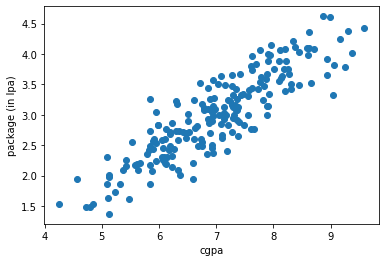

In [4]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("cgpa")
plt.ylabel("package (in lpa)")
plt.show()

#### Checking Distribution Pattern for Outlier Detection.

<AxesSubplot:xlabel='cgpa', ylabel='Density'>

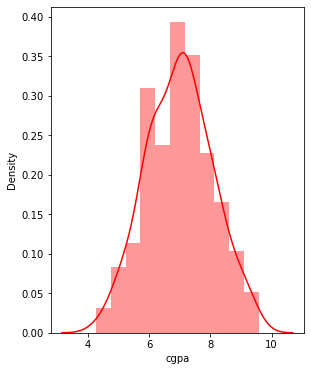

In [5]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.distplot(df["cgpa"], kde = True,color = "red")

In [6]:
print(f' Mean value of cgpa is {df["cgpa"].mean()}')
print(f' Standard deviation of cgpa is {df["cgpa"].std()}')
print(f' Minimum value of cgpa is {df["cgpa"].min()}')
print(f' Maximum value of cgpa is {df["cgpa"].max()}')


 Mean value of cgpa is 6.990500000000004
 Standard deviation of cgpa is 1.0694086798895523
 Minimum value of cgpa is 4.26
 Maximum value of cgpa is 9.58


##### Finding the boundary  values.

In [7]:
print(f" Highest Value is {df['cgpa'].mean() + 3*df['cgpa'].std()}")
print(f" Lowest Value is {df['cgpa'].mean() - 3*df['cgpa'].std()}")

 Highest Value is 10.198726039668662
 Lowest Value is 3.7822739603313473


In [8]:
df[(df['cgpa']>10.191)|(df['cgpa']<3.78)]

,cgpa,package


#### So we can say that all the values are in the range of boundary values so there is no outlier present in our dataset.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X = pd.DataFrame(scaler.fit_transform(df.drop(["package"],axis = 1)),columns =["cgpa"])
X.head()

,cgpa
0,-0.094213
1,-1.753487
2,0.777609
3,0.402632
4,-0.047341


In [11]:
X.shape

(200, 1)

In [12]:
y = df.iloc[:,[-1]]
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [13]:
Y = y.values.reshape(-1)
Y.shape

(200,)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 0)

In [15]:
print(f" The shape of X_train is {X_train.shape}")
print(f" The shape of X_test is {X_test.shape}")
print(f" The shape of X is {X.shape}")
print(f" The shape of Y is {Y.shape}")

 The shape of X_train is (160, 1)
 The shape of X_test is (40, 1)
 The shape of X is (200, 1)
 The shape of Y is (200,)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,Y_train)

LinearRegression()

In [19]:
X_test                               #X_test.iloc[2].values.reshape(1,1)

,cgpa
18,-0.047341
170,-0.722300
107,-0.619181
98,0.655741
177,0.093276
182,-1.041030
5,0.843230
146,-0.862916
12,1.827545
152,0.355760


In [20]:
Y_test

array([2.98, 2.87, 2.59, 3.83, 3.64, 2.08, 2.99, 2.46, 3.65, 3.08, 1.61,
       3.16, 2.72, 2.85, 3.44, 2.48, 2.73, 2.49, 2.43, 3.44, 2.72, 2.18,
       3.58, 4.08, 2.19, 2.3 , 3.03, 3.18, 2.01, 1.86, 2.35, 3.39, 2.73,
       2.25, 2.3 , 4.06, 3.12, 3.57, 3.49, 2.19])

In [21]:
#Checking the predicted values corrresponding to X_test that is y_prediction
lr.predict(X_test.iloc[0].values.reshape(-1,1))


array([2.97012606])

In [24]:
lr.predict([[-0.722300]])

array([2.55516794])

In [23]:
lr.predict([[-0.619181]])

array([2.61856447])

In [24]:
y_prediction=lr.predict(X_test)
x_prediction=lr.predict(X_train)

#### Visulizing the Testing Data:-

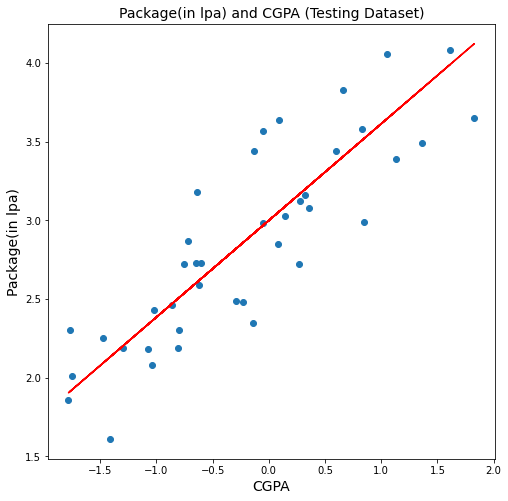

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_prediction,color='red')
plt.title("Package(in lpa) and CGPA (Testing Dataset)",fontsize=14)
plt.xlabel('CGPA',fontsize=14)
plt.ylabel('Package(in lpa)',fontsize=14)
plt.show()

In [26]:
# Calculating the slope
m = lr.coef_

In [27]:
# Calculating the intercept.
c = lr.intercept_

In [28]:
#y = mX + c

m*-0.047341 + c

array([2.97012598])

#### Visulizing the Training Data:-

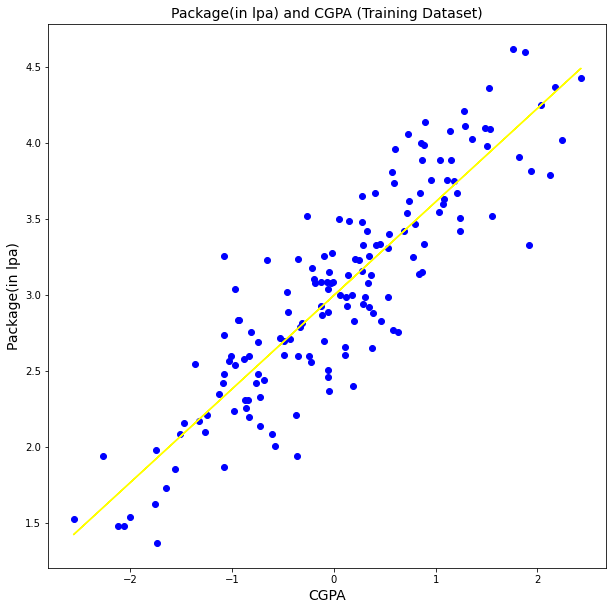

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(X_train,Y_train,color="blue")
plt.plot(X_train,lr.predict(X_train),color='yellow')
plt.title("Package(in lpa) and CGPA (Training Dataset)",fontsize=14)
plt.xlabel('CGPA',fontsize=14)
plt.ylabel('Package(in lpa)',fontsize=14)
plt.show()

In [31]:
y_prediction=lr.predict(X_test)

In [34]:
Y_test

array([2.98, 2.87, 2.59, 3.83, 3.64, 2.08, 2.99, 2.46, 3.65, 3.08, 1.61,
       3.16, 2.72, 2.85, 3.44, 2.48, 2.73, 2.49, 2.43, 3.44, 2.72, 2.18,
       3.58, 4.08, 2.19, 2.3 , 3.03, 3.18, 2.01, 1.86, 2.35, 3.39, 2.73,
       2.25, 2.3 , 4.06, 3.12, 3.57, 3.49, 2.19])

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
print(f"mae is {mean_absolute_error(Y_test,y_prediction)}")

mae is 0.2552433448620408


In [ ]:
print(f"mse is {mean_squared_error(Y_test,y_prediction)}")

In [38]:
print(f"r2_score is {r2_score(Y_test,y_prediction)}")

r2_score is 0.7297167943957026
